**Allan Reuben 260783324**

# **ECSE 415 Assigment 1**

# Part 1: Thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/drive')
# Change this path to run with files in a different location
# Not running this locally, but in my drive the notebook is at this filepath as well
# I am unsure whether this file pathing is what is desired by "assume input images are kept in the same directory as codes"
path = '/content/drive/My Drive/ECSE415/A1Images/'

%matplotlib inline
# Define thresholding function, image is already grey scale image

def simple_threshold(image, threshold):
    # 1: Get size of image
    h, w = image.shape
    # 2: Initialize output image to be similar to original image size
    output_image = np.zeros_like(image)
    # 3: Double for loop to iterate over every single pixel 
    for i in range(0, h):
      for j in range(0, w):
        # 4: Find the intensity using image.item from numPy as it is faster than image[i,j] and compare to threshold
        if image.item(i, j) > threshold:
          # 5: Set intensity to 255 if greater than threshold using itemset (faster than array access)
          output_image.itemset((i, j), 255)
        else:
          # 5: Else set to 0 if below threshold
          output_image.itemset((i, j), 0)
    return output_image

def window_threshold(image, threshold_lower, threshold_upper):
    # 1: Get size of image
    h, w = image.shape
    # 2: Initialize output image to be similar to original image size
    output_image = np.zeros_like(image)
    # 3: Double for loop to iterate over every single pixel
    for i in range(0, h):
      for j in range(0, w):
        # 4: Find the intensity using image.item from numPy as it is faster than image[i,j]
        # intensity is a variable used to reduce array accesses
        intensity = image.item(i,j)
        # 5: Compare to threshold values, if in between lower and upper set to 255, else 0
        if intensity > threshold_lower and intensity < threshold_upper:
          output_image.itemset((i, j), 255)
        else:
          output_image.itemset((i, j), 0)
    return output_image

Mounted at /content/drive


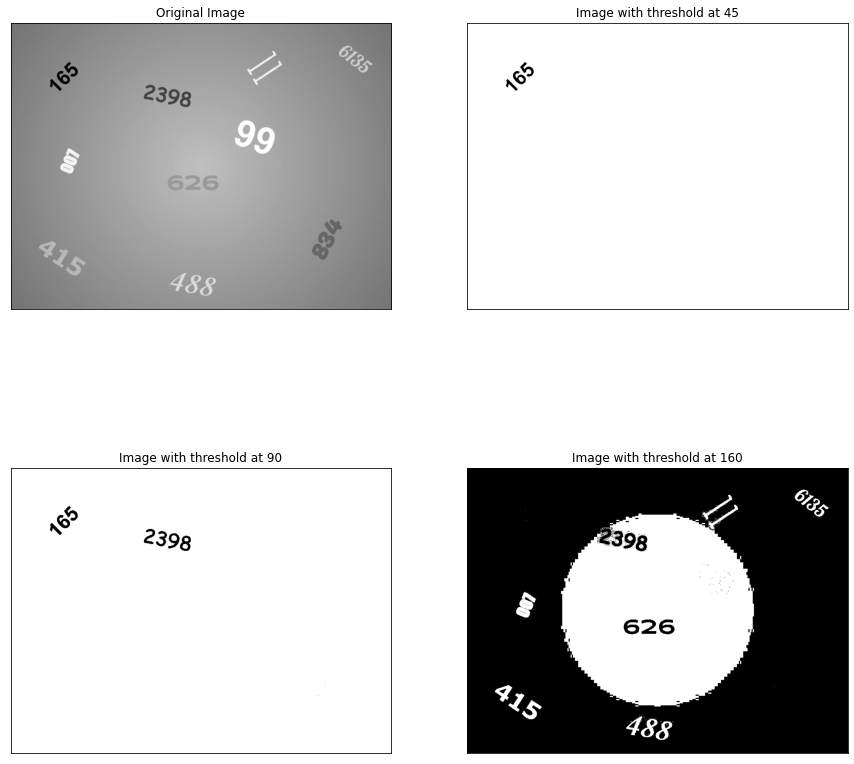

In [2]:
# Read in the image "numbers.jpg"
image = mpimg.imread(path+'numbers.jpg')
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Run simple binary threshold at 45, 90, and 160

simple45 = simple_threshold(gray_image, 45)
simple90 = simple_threshold(gray_image, 90)
simple160 = simple_threshold(gray_image, 160)

# Plot original image along with all 3 thresholded images
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(gray_image, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(simple45, cmap='gray')
plt.title("Image with threshold at 45"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(simple90, cmap='gray')
plt.title("Image with threshold at 90"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(simple160, cmap='gray')
plt.title("Image with threshold at 160"), plt.xticks([]), plt.yticks([])
plt.show()

---
1) Images at specified thresholds 45, 90, 160 shown above.

---

2)  a) With a threshold of 45, most of the image is set to 255, segmenting only the darkest number in the image, '165'.

b) With a threshold at 90, most of the image as well as the gradient background is still above the threshold, setting it to 255. The segmented numbers are '165' and '2398'.

c) With a threshold at 160, the gradient background is split. This allows numbers brighter than 160 to be seen on the background that is darker than 160 and numbers darker than 160 to be seen on a background brighter than 160. The segmented numbers are '6135', '11', '007', '415', and '418' on the now black background and '2398' and '626' on the white background.


---



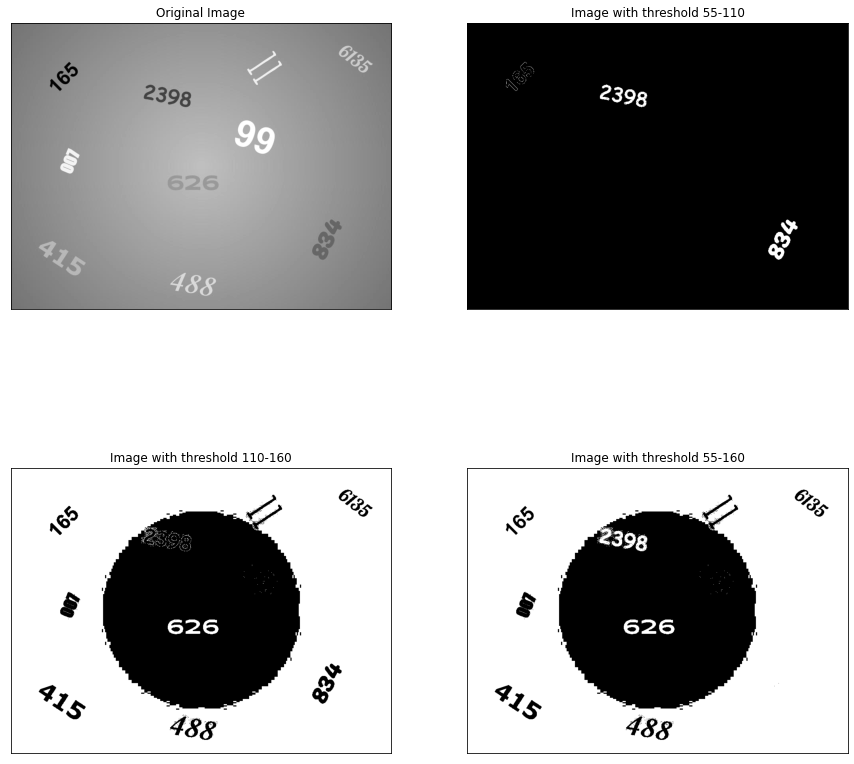

In [3]:
# Run window binary threshold at 45, 90, and 160

window55_110 = window_threshold(gray_image, 55, 110)
window110_160 = window_threshold(gray_image, 110, 160)
window55_160 = window_threshold(gray_image, 55, 160)

# Plot original image along with all 3 thresholded images
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(gray_image, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(window55_110, cmap='gray')
plt.title("Image with threshold 55-110"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(window110_160, cmap='gray')
plt.title("Image with threshold 110-160"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(window55_160, cmap='gray')
plt.title("Image with threshold 55-160"), plt.xticks([]), plt.yticks([])
plt.show()

---

3) Output images using window binary thresholding at ranges 55-110, 110-160, 55-160 shown above

a) With a threshold of 55-110, the gradient background is entirely set to black, with numbers '2398' and '834' segmented. We can also see a faint outline of the number 165, but it is not clear enough to be considered segmented.

b) With a threshold of 110-160, the gradient background is split near the centre of the image, indicating that the centre background is brighter than 160. We see that the numbers '6135', '11', '165', '007', '415', '488', and '834' are segmented as black on a white background (those numbers are outside the threshold range while the background is not) and the number '626' is segmented on a black background (the number is inside the threshold range while the gradient background is not). We also see artifacts from the number '2398' despite it not being segmented.

c) With a threshold of 55-160, the gradient background is split the same way as above. The segmented numbers are '6135', '11', '165', '007', '415', and '488' on a white background and '2398' and '626' are segmented on a black background.


---


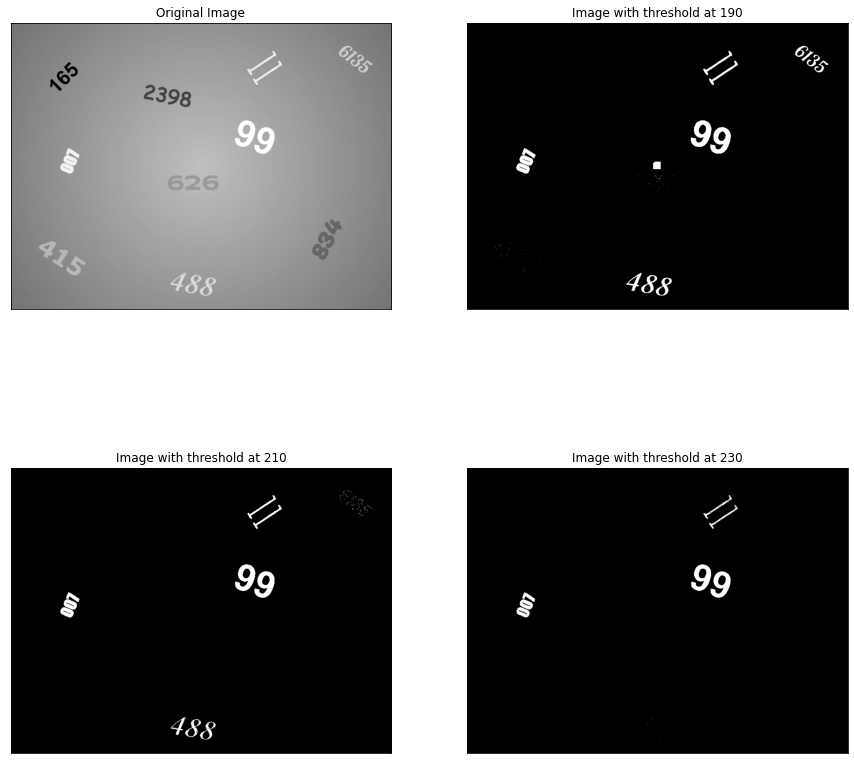

In [4]:
# Run simple binary threshold at 190, 210, and 230 in order to segment only the numbers 007, 11, and 99

simple190 = simple_threshold(gray_image, 190)
simple210 = simple_threshold(gray_image, 210)
simple230 = simple_threshold(gray_image, 230)

# Plot original image along with all 3 thresholded images
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(gray_image, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(simple190, cmap='gray')
plt.title("Image with threshold at 190"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(simple210, cmap='gray')
plt.title("Image with threshold at 210"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(simple230, cmap='gray')
plt.title("Image with threshold at 230"), plt.xticks([]), plt.yticks([])
plt.show()

---

4) I found that using a simple binary threshold with a value of 230 properly segments only the values '007', '11', and '99' as intended. From the simple binary threshold tests in part 1, I noticed that all three numbers were segmented even with a threshold of 160, indicating that the threshold must be higher to segment only those three numbers.

Raising my simple binary threshold value to 210, I noticed that it was closer to the intended output but the number '488' was still segmented, meaning that the threshold must still be higher. In the event that '488' was still segmented when one of the intended outputs was not, I would have used a window binary threshold function to continue.

Further raising the simple binary threshold value to 230, we can see that the only segmented numbers are '007', '11', and '99', the intended result.

---

# Part 2: Denoising

In [5]:
# Function definition for 2D convolution formula
# Computes the result of convolution after arrays are selected
# Flipping kernel follows definition of convolution from: http://www.songho.ca/dsp/convolution/convolution.html
def convolve(array, kernel):
  flipped_kernel = np.flip(kernel,(0,1)) # Flip kernel along both axes
  output = np.multiply(array, flipped_kernel) # Multiply arrays by index
  return np.sum(output) # Sum the output as result of convolution

# Function definitions for Gaussian, Box, and Median filters

def gaussian_filter(image, kernel_size):
  # 0: Define 3x3 gaussian kernel with variance of 2 --> stddev = sqrt(2)
  # Kernel obtained from: http://dev.theomader.com/gaussian-kernel-calculator/
  kernel = np.array([[0.093465, 0.118791, 0.093465],
                     [0.118791, 0.15098, 0.118791],
                     [0.093465, 0.118791, 0.093465]])
  # 1: Pad size calculation, for a 3x3 kernel pad should be 1 pixel
  pad_size = np.floor(kernel_size/2).astype("uint8")
  # 2: Zero padding around the edge of the input image
  padded_image = np.pad(image, pad_width=int(pad_size), mode='constant', constant_values=0)
  # 3: Get size of image
  h, w = padded_image.shape
  # 4: Initialize output image to be similar to original image size
  output_image = np.zeros_like(image)
  # 5: Double for loop to iterate over every single pixel
  for i in range(0, h - 2*pad_size):
    for j in range(0, w - 2*pad_size):
      # Convolve the relevant image segment with the kernel and set output accordingly
      output_image[i,j] = convolve(padded_image[i:i+kernel_size, j:j+kernel_size], kernel)
  return output_image

def box_filter(image, kernel_size):
  # 1: Pad size calculation, for a 3x3 kernel pad should be 1 pixel
  pad_size = np.floor(kernel_size/2).astype("uint8")
  # 2: Zero padding around the edge of the input image
  padded_image = np.pad(image, pad_width=int(pad_size), mode='constant', constant_values=0)
  # 3: Get size of image
  h, w = padded_image.shape
  # 4: Initialize output image to be similar to original image size
  output_image = np.zeros_like(image)
  # 5: Double for loop to iterate over every single pixel
  for i in range(0, h - 2*pad_size):
    for j in range(0, w - 2*pad_size):
      # Sum the relevant image segment and divide by the number of pixels summed
      # Equal to using the convolve() method I wrote with a box filter
      output_image[i,j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size]) / (kernel_size * kernel_size)
  return output_image

def median_filter(image, kernel_size):
  # 1: Pad size calculation, for a 3x3 kernel pad should be 1 pixel
  pad_size = np.floor(kernel_size/2).astype("uint8")
  # 2: Zero padding around the edge of the input image
  padded_image = np.pad(image, pad_width=int(pad_size), mode='constant', constant_values=0)
  # 3: Get size of image
  h, w = padded_image.shape
  # 4: Initialize output image to be similar to original image size
  output_image = np.zeros_like(image)
  # 5: Double for loop to iterate over every single pixel
  for i in range(0, h - 2*pad_size):
    for j in range(0, w - 2*pad_size):
      # Find the median of the relevant image segment specified by kernel size
      output_image[i,j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])
  return output_image

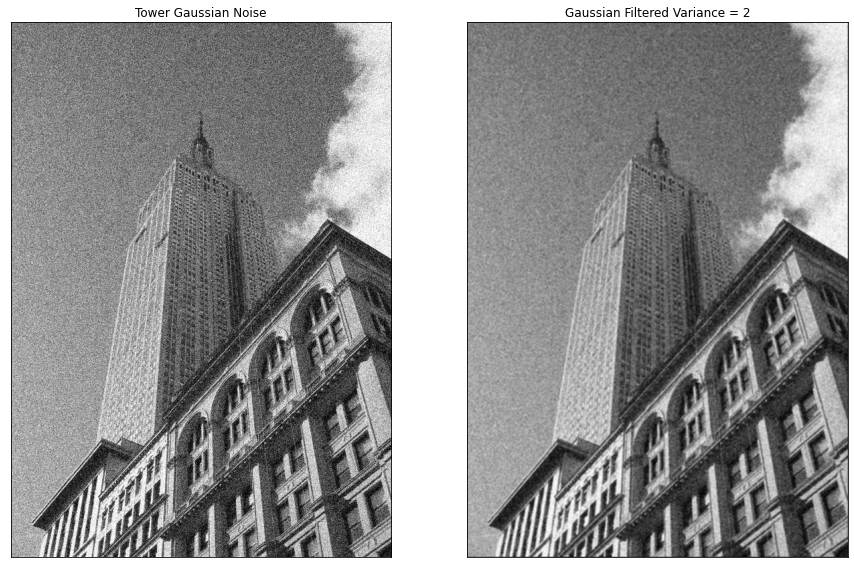

In [6]:
# Read in the image "Tower.png", "Tower_Gauss_Noise.png", "Tower_Salt_And_Pepper_Noise.png" and convert to grayscale
tower = mpimg.imread(path+'Tower.png')
gray_tower = cv2.cvtColor(tower, cv2.COLOR_RGB2GRAY)

tower_gauss = mpimg.imread(path+'Tower_Gauss_Noise.png')
gray_tower_gauss = cv2.cvtColor(tower_gauss, cv2.COLOR_RGB2GRAY)

tower_sp = mpimg.imread(path+'Tower_Salt_and_Pepper_Noise.png')
gray_tower_sp = cv2.cvtColor(tower_sp, cv2.COLOR_RGB2GRAY)

# Run gaussian and box filters on gray_tower_gauss to denoise
gaussian_output = gaussian_filter(gray_tower_gauss, 3)
box_output = box_filter(gray_tower_gauss, 3)

# Plot Tower with Gaussian Noise next to the result after using a gaussian filter
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(gray_tower_gauss, cmap='gray')
plt.title("Tower Gaussian Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_output, cmap='gray')
plt.title("Gaussian Filtered Variance = 2"), plt.xticks([]), plt.yticks([])
plt.show()

---

1) Above are the images of the grayscale tower corrupted with gaussian noise and the result of filtering that image with a Gaussian filter with variance = 2. We can see that the resulting image has been slightly smoothed, but with gaussian noise corruption still clearly visible.

---

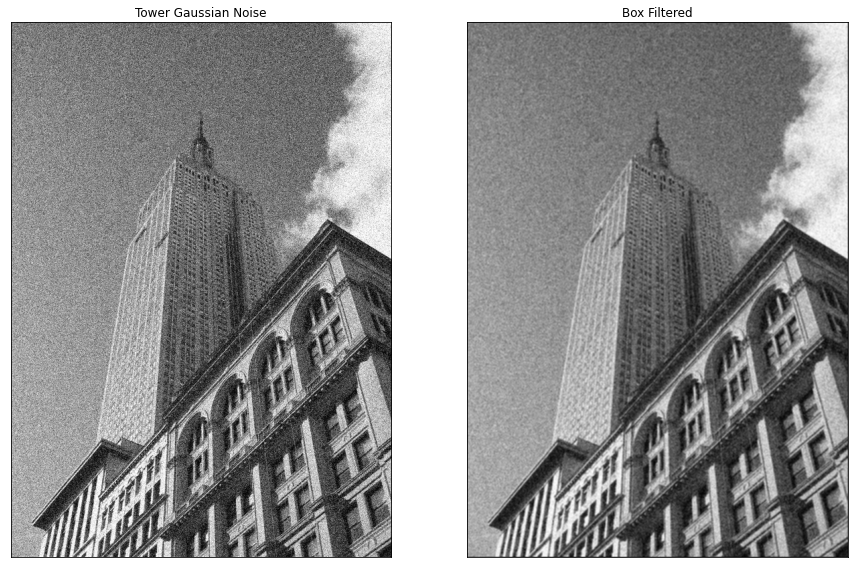

The PSNR for the grayscale unfiltered image is: 67.9851393490772
The PSNR for the grayscale gaussian filtered image is: 72.99868540188696
The PSNR for the grayscale box filtered image is: 72.7007310263241


In [7]:
# Plot Tower with Gaussian Noise next to the result after using a box filter
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(gray_tower_gauss, cmap='gray')
plt.title("Tower Gaussian Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_output, cmap='gray')
plt.title("Box Filtered"), plt.xticks([]), plt.yticks([])
plt.show()

# Calculate the peak signal to noise ratios of the image corrupted with gaussian noise, 
# All relative to the original uncorrupted image
basepsnr = cv2.PSNR(gray_tower, gray_tower_gauss)
gaussianpsnr = cv2.PSNR(gray_tower, gaussian_output)
boxpsnr = cv2.PSNR(gray_tower, box_output)

# Display PSNR figures
print("The PSNR for the grayscale unfiltered image is:", basepsnr)
print("The PSNR for the grayscale gaussian filtered image is:", gaussianpsnr)
print("The PSNR for the grayscale box filtered image is:", boxpsnr)

---

2) Above are the images of the grayscale tower corrupted with gaussian noise and the result of filtering that image with a Box filter. We can see that the resulting image has been slightly smoothed, and not significantly different from the resulting image from gaussian filtering.

---

3) We can see that after filtering, the peak signal to noise ratio of the images increased with both gaussian filtering and box filtering methods. The PSNR of the gaussian filtered image was roughly 73 while the box filter PSNR was roughly 72.7

This similarity with peak signal to noise methods is expected, with the gaussian filter performing slightly better due to its filtration of high frequency components.

---

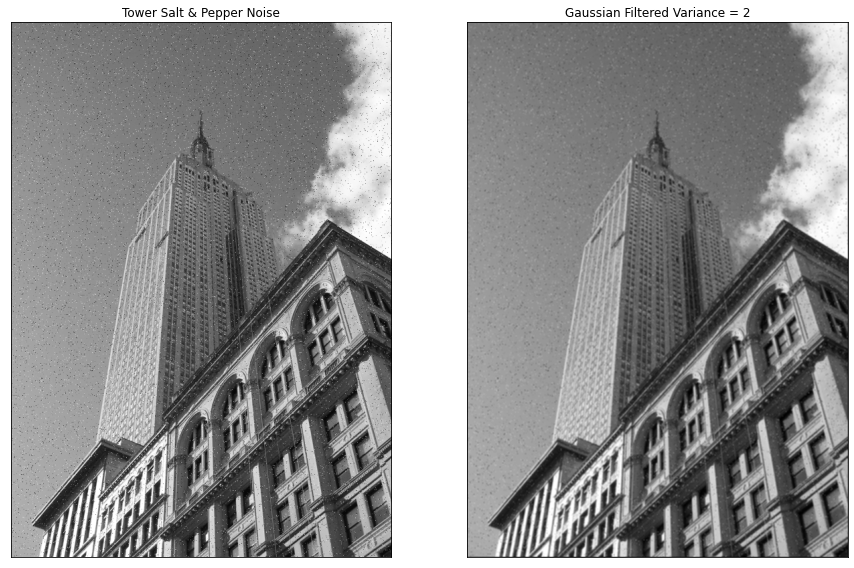

In [8]:
# Run gaussian and median filters on gray_tower_sp to attempt denoising
gaussian_sp_output = gaussian_filter(gray_tower_sp, 3)
median_sp_output = median_filter(gray_tower_sp, 3)

# Plot Tower with S&P Noise next to the result after using a gaussian filter
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(gray_tower_sp, cmap='gray')
plt.title("Tower Salt & Pepper Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_sp_output, cmap='gray')
plt.title("Gaussian Filtered Variance = 2"), plt.xticks([]), plt.yticks([])
plt.show()

---

5) Above are the images of the grayscale tower corrupted with salt & pepper noise and the result of filtering that image with a Gaussian filter with variance 2. We can see that the resulting image still has visible salt & pepper grains, albeit fewer than before the filter was run. It has also become blurrier, which is to be expected with a gaussian filter.

---

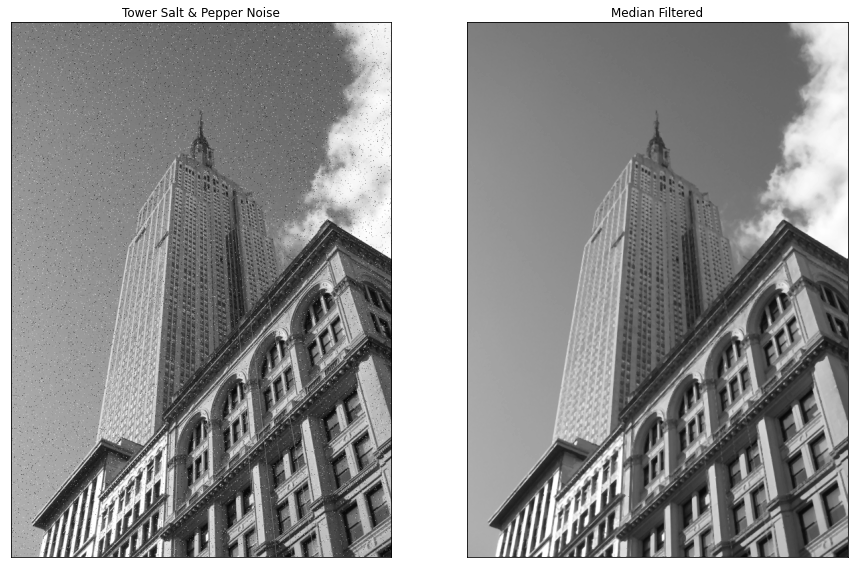

The PSNR for the grayscale unfiltered image is: 72.9370164179234
The PSNR for the grayscale gaussian filtered image is: 74.50536495166561
The PSNR for the grayscale median filtered image is: 76.87560212193803


In [9]:
# Plot Tower with S&P Noise next to the result after using a median filter
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(gray_tower_sp, cmap='gray')
plt.title("Tower Salt & Pepper Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median_sp_output, cmap='gray')
plt.title("Median Filtered"), plt.xticks([]), plt.yticks([])
plt.show()

# Calculate the peak signal to noise ratios of the image corrupted with S&P noise, 
# All relative to the original uncorrupted image
base_psnr = cv2.PSNR(gray_tower, gray_tower_sp)
gaussian_sp_psnr = cv2.PSNR(gray_tower, gaussian_sp_output)
median_sp_psnr = cv2.PSNR(gray_tower, median_sp_output)

# Display PSNR figures
print("The PSNR for the grayscale unfiltered image is:", base_psnr)
print("The PSNR for the grayscale gaussian filtered image is:", gaussian_sp_psnr)
print("The PSNR for the grayscale median filtered image is:", median_sp_psnr)

---

5) Above are the images of the grayscale tower corrupted with salt & pepper noise and the result of filtering that image with a Median filter. We can see that the resulting image has no visible salt & pepper grains, but has developed intensity blocks, visible in the sky where a smooth gradient once existed.

---

6) We can see that after filtering, the peak signal to noise ratio of the images increased with both gaussian filtering and median filtering methods. The PSNR of the gaussian filtered image was roughly 74.5 while the box filter PSNR was roughly 76.9

The median filter outperforming the gaussian filter was expected, as salt & pepper noise is multiplicative, meaning that the linear gaussian filter has a harder time dealing with it relative to the non-linear median filter.

---

# Part 3: Sobel Edge Detector

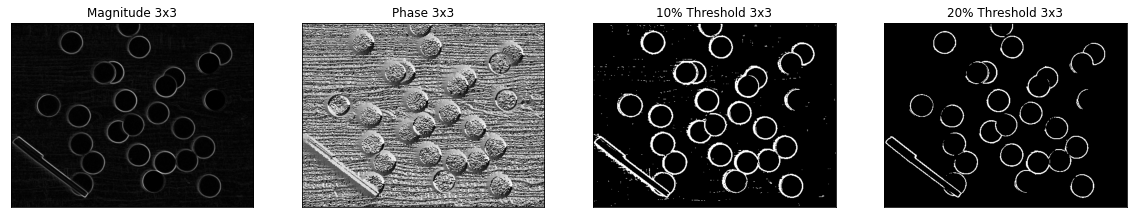

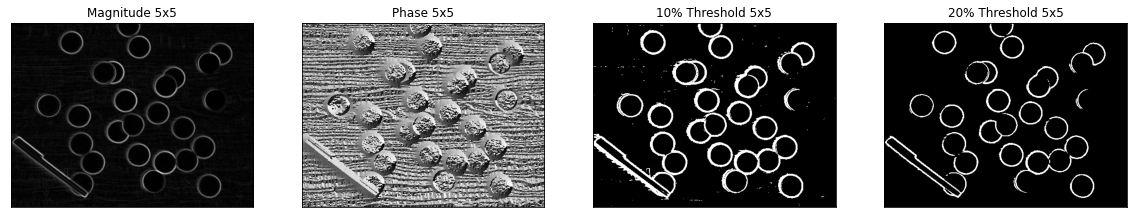

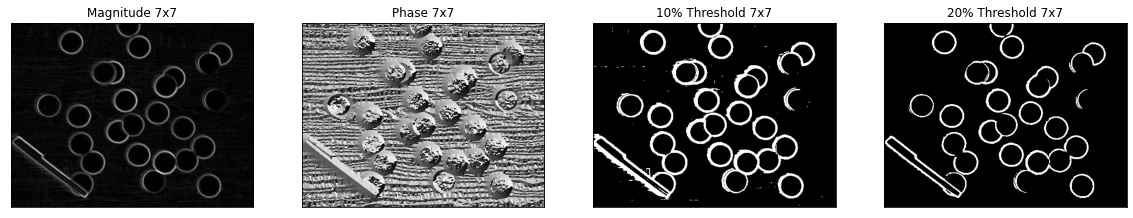

In [10]:
# Read in the image "Circles.png", and "Circles_gauss.png" and convert to grayscale
circles = mpimg.imread(path+'Circles.png')
gray_circles = cv2.cvtColor(circles, cv2.COLOR_RGB2GRAY)

circles_gauss = mpimg.imread(path+'Circles_gauss.png')
gray_circles_gauss = cv2.cvtColor(circles_gauss, cv2.COLOR_RGB2GRAY)

# Apply 3x3 sobel filter to circles.png
sobel_x_3 = cv2.Sobel(gray_circles, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_3 = cv2.Sobel(gray_circles, cv2.CV_64F, 0, 1, ksize=3)

# Compute sobel Magnitude/Phase for 3x3 sobel
sobel_m_3 = cv2.magnitude(sobel_x_3, sobel_y_3)
sobel_p_3 = cv2.phase(sobel_x_3, sobel_y_3)

# Compute 10% and 20% thresholded gradient magnitude images for 3x3 sobel
sobel_10_3 = simple_threshold(sobel_m_3, np.amax(sobel_m_3)/10)
sobel_20_3 = simple_threshold(sobel_m_3, np.amax(sobel_m_3)/5)


# Apply 5x5 sobel filter to circles.png
sobel_x_5 = cv2.Sobel(gray_circles, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_5 = cv2.Sobel(gray_circles, cv2.CV_64F, 0, 1, ksize=5)

# Compute sobel Magnitude/Phase for 5x5 sobel
sobel_m_5 = cv2.magnitude(sobel_x_5, sobel_y_5)
sobel_p_5 = cv2.phase(sobel_x_5, sobel_y_5)

# Compute 10% and 20% thresholded gradient magnitude images for 5x5 sobel
sobel_10_5 = simple_threshold(sobel_m_5, np.amax(sobel_m_5)/10)
sobel_20_5 = simple_threshold(sobel_m_5, np.amax(sobel_m_5)/5)


# Apply 7x7 sobel filter to circles.png
sobel_x_7 = cv2.Sobel(gray_circles, cv2.CV_64F, 1, 0, ksize=7)
sobel_y_7 = cv2.Sobel(gray_circles, cv2.CV_64F, 0, 1, ksize=7)

# Compute sobel Magnitude/Phase for 7x7 sobel
sobel_m_7 = cv2.magnitude(sobel_x_7, sobel_y_7)
sobel_p_7 = cv2.phase(sobel_x_7, sobel_y_7)

# Compute 10% and 20% thresholded gradient magnitude images for 7x7 sobel
sobel_10_7 = simple_threshold(sobel_m_7, np.amax(sobel_m_7)/10)
sobel_20_7 = simple_threshold(sobel_m_7, np.amax(sobel_m_7)/5)

# Plot 3x3 Sobel magnitude, phase, 10% thresholded, and 20% thresholded
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(sobel_m_3, cmap='gray')
plt.title("Magnitude 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_p_3, cmap='gray')
plt.title("Phase 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sobel_10_3, cmap='gray')
plt.title("10% Threshold 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sobel_20_3, cmap='gray')
plt.title("20% Threshold 3x3"), plt.xticks([]), plt.yticks([])
plt.show()

# Plot 5x5 Sobel magnitude, phase, 10% thresholded, and 20% thresholded
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(sobel_m_5, cmap='gray')
plt.title("Magnitude 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_p_5, cmap='gray')
plt.title("Phase 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sobel_10_5, cmap='gray')
plt.title("10% Threshold 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sobel_20_5, cmap='gray')
plt.title("20% Threshold 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

# Plot 7x7 Sobel magnitude, phase, 10% thresholded, and 20% thresholded
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(sobel_m_7, cmap='gray')
plt.title("Magnitude 7x7"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_p_7, cmap='gray')
plt.title("Phase 7x7"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sobel_10_7, cmap='gray')
plt.title("10% Threshold 7x7"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sobel_20_7, cmap='gray')
plt.title("20% Threshold 7x7"), plt.xticks([]), plt.yticks([])
plt.show()

---

1) Results for the Sobel edge detector magnitude, phase, and thresholded magnitudes of 10% and 20% for all three kernel sizes (3x3, 5x5, 7x7) shown above

---

2) In the above images (neatly lined up to allow for quick comaprisons), we can see that as the kernel size increases, the following things occur: Edge detection got better, as we can see by comparing the 3x3 and 7x7 20% thresholds; Edge detection outside of the circles and pen (from the wood grain) became less common, as we can see by comparing the 3x3 and 7x7 10% thresholds; and the size of the edges became notably bigger, which we can see in all diagrams as more pixels are included in the convolution. This is consistent with the theory we learned in class that as kernel size increases edge detection becomes better while localization gets worse.

---

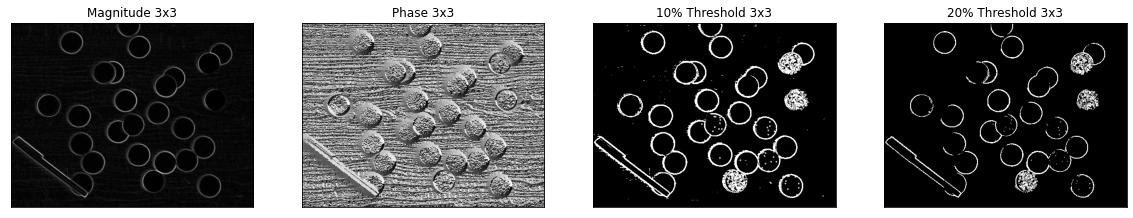

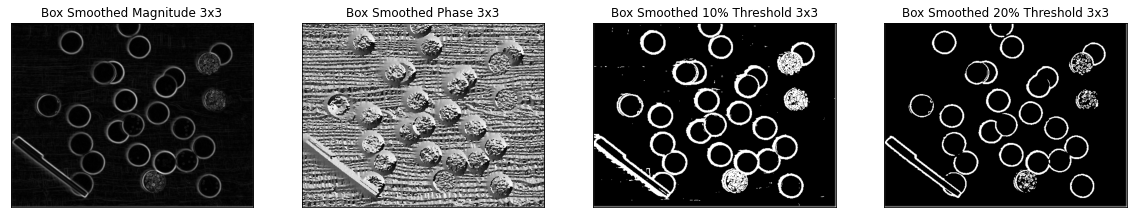

In [11]:
# Apply 3x3 sobel filter to grayscale circles_gauss.png
sobel_gauss_x_3 = cv2.Sobel(gray_circles_gauss, cv2.CV_64F, 1, 0, ksize=3)
sobel_gauss_y_3 = cv2.Sobel(gray_circles_gauss, cv2.CV_64F, 0, 1, ksize=3)

# Compute sobel Magnitude/Phase for 3x3 sobel
sobel_gauss_m_3 = cv2.magnitude(sobel_gauss_x_3, sobel_gauss_y_3)
sobel_gauss_p_3 = cv2.phase(sobel_gauss_x_3, sobel_gauss_y_3)

# Compute 10% and 20% thresholded gradient magnitude images for 3x3 sobel
sobel_10_3 = simple_threshold(sobel_gauss_m_3, np.amax(sobel_gauss_m_3)/10)
sobel_20_3 = simple_threshold(sobel_gauss_m_3, np.amax(sobel_gauss_m_3)/5)


# Apply 3x3 box filter to grayscale circles_gauss.png
sobel_box_3 = box_filter(gray_circles_gauss, 3)

# Apply 3x3 sobel filter to box filtered image
sobel_box_x_3 = cv2.Sobel(sobel_box_3, cv2.CV_64F, 1, 0, ksize=3)
sobel_box_y_3 = cv2.Sobel(sobel_box_3, cv2.CV_64F, 0, 1, ksize=3)

# Compute sobel Magnitude/Phase for 3x3 smoothed sobel
sobel_box_m_3 = cv2.magnitude(sobel_box_x_3, sobel_box_y_3)
sobel_box_p_3 = cv2.phase(sobel_box_x_3, sobel_box_y_3)

# Compute 10% and 20% thresholded gradient magnitude images for 3x3 sobel
sobel_box_10_3 = simple_threshold(sobel_box_m_3, np.amax(sobel_box_m_3)/10)
sobel_box_20_3 = simple_threshold(sobel_box_m_3, np.amax(sobel_box_m_3)/5)


# Plot 3x3 sobel magnitude, phase, 10% thresholded, and 20% thresholded
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(sobel_m_3, cmap='gray')
plt.title("Magnitude 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_p_3, cmap='gray')
plt.title("Phase 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sobel_10_3, cmap='gray')
plt.title("10% Threshold 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sobel_20_3, cmap='gray')
plt.title("20% Threshold 3x3"), plt.xticks([]), plt.yticks([])
plt.show()

# Plot 3x3 box smoothed sobel magnitude, phase, 10% thresholded, and 20% thresholded
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(sobel_box_m_3, cmap='gray')
plt.title("Box Smoothed Magnitude 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_box_p_3, cmap='gray')
plt.title("Box Smoothed Phase 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sobel_box_10_3, cmap='gray')
plt.title("Box Smoothed 10% Threshold 3x3"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(sobel_box_20_3, cmap='gray')
plt.title("Box Smoothed 20% Threshold 3x3"), plt.xticks([]), plt.yticks([])
plt.show()

---

3) Applied a sobel edge detector to the noisy circles image and displayed reuslts of magnitude, phase, 10% thresholding, and 20% thresholding

---

4) Applied a smoothing box filter then applied the same sobel edge detector as above, displayed reuslts of magnitude, phase, 10% thresholding, and 20% thresholding

---

5) Denoising before applying the sobel edge detector resulted in a clearly better result. Comparing the 20% thresholded images, we can see that the circle edges are more defined and complete.

In these images we can also see that the noise that the image was corrupted with was noticably less visible in the smoothed output images. Circles which did not have significant corruption by gaussian noise had it completely removed (in the 20% thresholded comparison), and circles with a lot of noise had it reduced after smoothing. 

---